## Домашнее задание 4. DeepDream

https://research.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html  
Пример реализации на pytorch: https://github.com/eriklindernoren/PyTorch-Deep-Dream

In [ ]:
# Введите ваши имя и фамилию
name = "Fedor Petriaikin"

In [ ]:
%matplotlib inline

In [17]:
import torchvision.models as models
import torchvision.transforms as transforms
import torch
import numpy as np
from PIL import Image
import copy

from IPython.display import display

In [3]:
mean = [0.485, 0.456, 0.406] 
std  = [0.229, 0.224, 0.225]
trans = transforms.Compose([
            transforms.Normalize(mean, std)
        ])
    
def numpy2image(img_numpy):
    if img_numpy.dtype == np.dtype('float64'): #нужно домножить на 255 и поменять тип
        img_numpy = (img_numpy*255).astype('uint8')
    return Image.fromarray(img_numpy)

**Используем метод Gradient Ascent.**
1. Пропускаем картинку через сеть
2. Устанавливаем градиент выбранного слоя (не нейрона) равным их активации (dx=x)
3. Делаем backward
4. Обновляем картинку


**Дополнительно делают:**
1. смешения картинки (то есть при каждой итерации циклически поворачивают картинку) np.roll
2. нормализацию градиента (на среднее или l1 норму)
3. клип значений пикселей np.clip - чтобы срезать значения ниже 0 и выше 1

In [12]:
img_deep_dream = np.asarray(Image.open('./sea.jpeg')) / 255.0

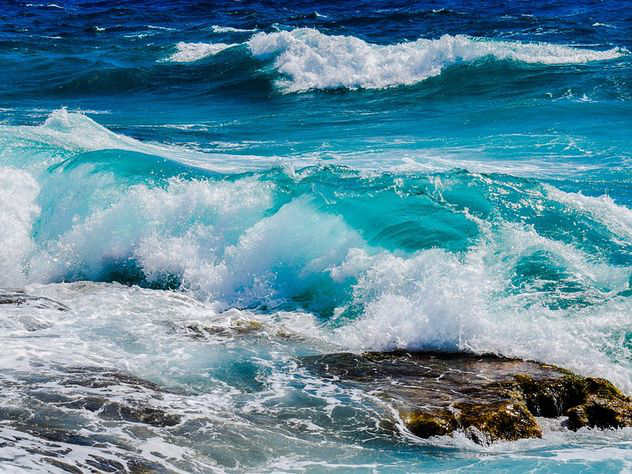

In [14]:
numpy2image(img_deep_dream)

In [ ]:
# #Пример как сделать forward до заданного слоя в resnet
net = models.resnet34(pretrained=True)

def my_forward(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.maxpool(x)
    x = self.layer1(x)
    return x

in_img = torch.from_numpy(img_deep_dream).transpose(2,1).transpose(1,0).float()
in_img = torch.Tensor(trans(in_img).unsqueeze(0)).requires_grad_()
my_forward(net, in_img)

In [ ]:
print(net)

### Задание 1
Применить всю сеть без fullconnected слоев (должны получить лица животных и что-то визуально внятное)

In [ ]:
img = copy.deepcopy(img_deep_dream)

max_jitter = 32
step_size = 0    
TRACE_ITER = 5
for iter_id in range(100):
    shift_x, shift_y = np.random.randint(-max_jitter, max_jitter + 1, 2)
    img_inp = np.roll(np.roll(img, shift_x, -1), shift_y, -2) # Смещения регуляризируют активации

    in_img = torch.from_numpy(img_inp).transpose(2, 1).transpose(1, 0).float()
    in_img = torch.Tensor(trans(in_img).unsqueeze(0)).requires_grad_() # тут нам нужен будет градиент
    
    # forward до нужного слоя
    # backward dx=x - такой градиент дает tensor.norm()!
    # YOUR CODE HERE

    # Получаем градиент из картинки
    grad = in_img.grad
    grad = grad[0, :, :, :]
    grad = grad.transpose(0, 1).transpose(1, 2).numpy() # превращаем градиент в numpy
    
    # Обновление img. Подберите learning rate, не забудьте нормировать градиент
    # img += ...
    
    img = np.clip(img, 0, 1)
    if iter_id % TRACE_ITER == 0:
        print("Iter %d" % iter_id)
        display(numpy2image(img))
        
print("Iter %d" % iter_id)
display(numpy2image(img))

### Задание 2
Сделать deep dream по нижним слоям (после 1-2 конволюций) - должы закрасить некоторой текстурой картинку в итоге

In [ ]:
# YOUR CODE HERE

### Задание 3
Сделать deep dream по средним слоям - должы закрасить некоторыми осмысленными узорами картинку в итоге

In [ ]:
# YOUR CODE HERE

Спасибо за выполнение заданий!